In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# read the data
train = pd.read_csv("occupancy_train.txt")
test = pd.read_csv("occupancy_test.txt")

# use only Humidity, Light, HumidityRatio as input and Occupancy as output
X_train = train[["Humidity","Light","HumidityRatio"]]
y_train = train["Occupancy"]

X_test = test[["Humidity","Light","HumidityRatio"]]
y_test = test["Occupancy"]

# dictionary to save accuracies
acc_dict = {}

# run K from 1 to 10
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    acc_dict[k] = acc
    print("K =",k," Accuracy =",acc)

# find best K
best_k = max(acc_dict, key=acc_dict.get)
print("Best Accuracy =", acc_dict[best_k])
print("Best K =", best_k)


K = 1  Accuracy = 0.9403377110694184
K = 2  Accuracy = 0.925328330206379
K = 3  Accuracy = 0.9572232645403377
K = 4  Accuracy = 0.9448405253283302
K = 5  Accuracy = 0.9553470919324578
K = 6  Accuracy = 0.9527204502814259
K = 7  Accuracy = 0.9632270168855535
K = 8  Accuracy = 0.9613508442776736
K = 9  Accuracy = 0.9647279549718574
K = 10  Accuracy = 0.9647279549718574
Best Accuracy = 0.9647279549718574
Best K = 9


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

# chi-square distance function
def chi_square_distance(x, y):
    return np.sum((x - y) ** 2 / (x + y + 1e-9))  # added small value to avoid division by zero

# KNN from scratch
def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        d = chi_square_distance(x_test, X_train[i])
        distances.append((d, y_train[i]))
    distances.sort(key=lambda t: t[0])
    neighbors = [label for _, label in distances[:k]]
    return Counter(neighbors).most_common(1)[0][0]

# load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# predictions
k = 5
predictions = []
for x in X_test:
    pred = knn_predict(X_train, y_train, x, k)
    predictions.append(pred)

# accuracy
accuracy = np.mean(np.array(predictions) == y_test)
print("Accuracy:", round(accuracy, 4))

# confusion matrix
num_classes = len(np.unique(y))
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
for true, pred in zip(y_test, predictions):
    conf_matrix[true][pred] += 1

print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
data = pd.read_csv("cancer patient data sets (1).csv")

# First look
print(data.head())
print(data.info())
print(data.describe())


   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

Age
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
25    30
24    30
62    30
46    23
39    21
36    21
17    20
47    20
42    20
19    20
29    19
53    19
23    19
22    19
18    18
55    11
34    10
65    10
73    10
64    10
49    10
61    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: count, dtype: int64


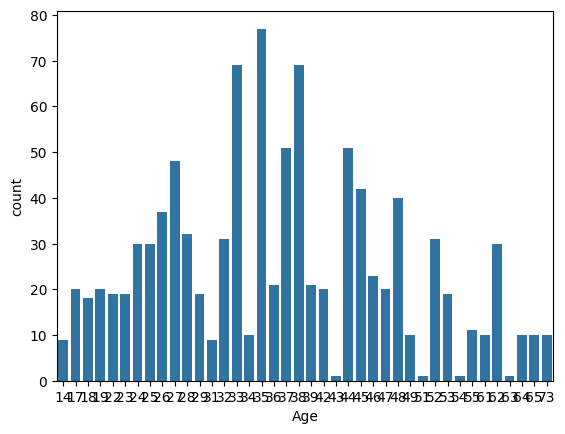

In [15]:
print(data["Age"].value_counts())
sns.countplot(x="Age", data=data)
plt.show()


In [17]:
# Remove duplicates
data = data.drop_duplicates()

# Fill missing with median (numeric only)
data = data.fillna(data.median(numeric_only=True))

# Convert categorical to numbers
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])


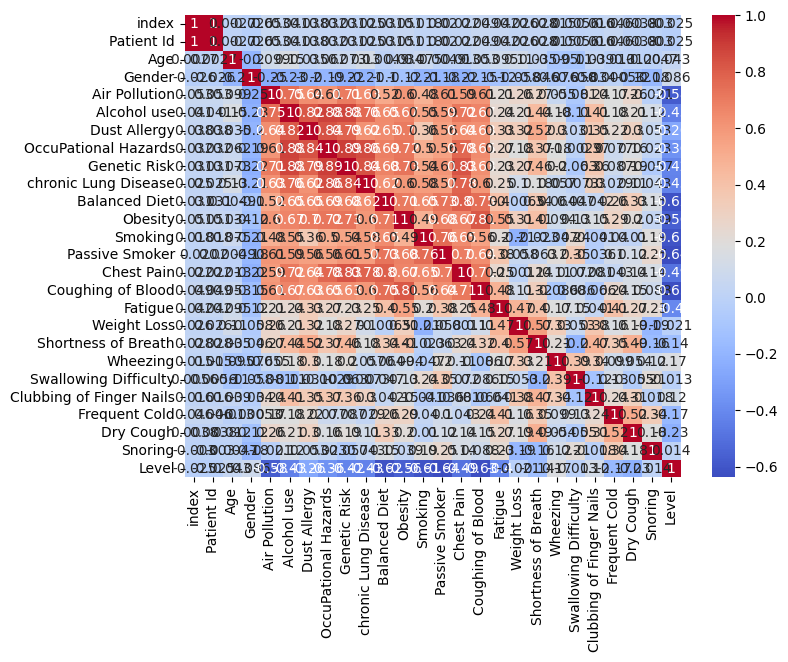

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


In [20]:
X = data.drop("Patient Id", axis=1)
y = data["Patient Id"]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [21]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# From train split, take 30% as validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)


In [22]:
metrics = ["euclidean", "manhattan"]
results = []

for m in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=m)
    knn.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, knn.predict(X_train))
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    test_acc = accuracy_score(y_test, knn.predict(X_test))

    results.append([m, train_acc, val_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Metric", "Train_Acc", "Val_Acc", "Test_Acc"])
print(df_results)


      Metric  Train_Acc  Val_Acc  Test_Acc
0  euclidean   0.116071      0.0       0.0
1  manhattan   0.125000      0.0       0.0
